In [ ]:
!pip install datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Dataset

In [ ]:
data = load_dataset('ziq/RSNA-ATD2023')
data

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'series_id', 'frame_id', 'image', 'mask'],
        num_rows: 70291
    })
})

# Train Test Split

In [ ]:
data = data['train'].train_test_split(test_size=0.2)
labels = ["background", "liver", "spleen", "right_kidney", "left_kidney", "bowel"]

In [ ]:
train, test = data['train'], data['test']
len(train), len(test)

(56232, 14059)

In [ ]:
train[0]

{'patient_id': 62360,
 'series_id': 51136,
 'frame_id': 631,
 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=512x512>,
 'mask': <PIL.PngImagePlugin.PngImageFile image mode=L size=512x512>}

In [ ]:
ids = 3
image, mask = train[ids]['image'], train[ids]['mask']

mask = np.array(mask)
liver, spleen, right_kidney, left_kidney, bowel = [(mask == i,1,0)[0] * i for i in range(1, len(labels))]

# Plot Dataset

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm

colors = ['#02020e', '#520e6d', '#c13a50', '#f57d15', '#fac62c', '#f4f88e'] # inferno
bounds = range(0, len(colors) + 1)

# Define the boundaries for each class in the colormap
cmap, norm = ListedColormap(colors), BoundaryNorm(bounds, len(colors))

# Plot the segmentation mask with the custom colormap
def plot_mask(mask, alpha=1.0):
    _, ax = plt.subplots()
    cax = ax.imshow(mask, cmap=cmap, norm=norm, alpha=alpha)
    cbar = plt.colorbar(cax, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds)
    cbar.set_ticks([])
    _labels = [""] + labels
    for i in range(1, len(_labels)):
        cbar.ax.text(2, -0.5 + i, _labels[i], ha='left', color=colors[i - 1], fontsize=8)
    plt.axis('off')
    plt.show()
    
def plot(image, mask, cmap='gray'):
    plt.imshow(image * np.where(mask > 0,1,0), cmap=cmap)
    plt.axis('off')
    plt.show()

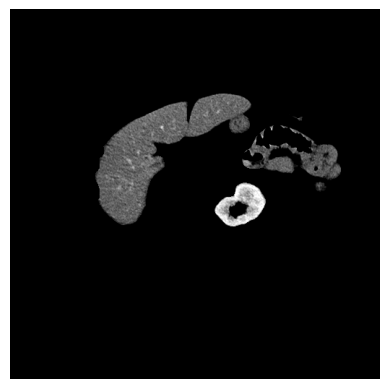

In [ ]:
plot(image, mask)

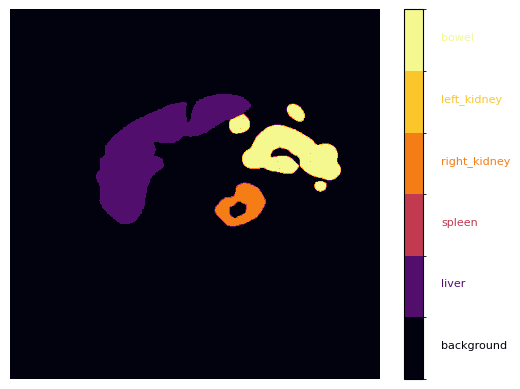

In [ ]:
plot_mask(mask)